In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib 

import geopandas as gpd
from shapely.geometry import Point
import folium


In [2]:
train = pd.read_csv("Co2/train.csv")
test = pd.read_csv("Co2/test.csv")

In [3]:
train.head(5)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [4]:
###create column locate

In [5]:
#location = latitide + longitude

In [6]:
train['location'] = ['lat:' + str(x) +'_'+ 'long:' + str(y) for x, y in zip(train.latitude, train.longitude)]


In [7]:
train['location']

0          lat:-0.51_long:29.29
1          lat:-0.51_long:29.29
2          lat:-0.51_long:29.29
3          lat:-0.51_long:29.29
4          lat:-0.51_long:29.29
                  ...          
79018    lat:-3.299_long:30.301
79019    lat:-3.299_long:30.301
79020    lat:-3.299_long:30.301
79021    lat:-3.299_long:30.301
79022    lat:-3.299_long:30.301
Name: location, Length: 79023, dtype: object

In [8]:
ex = train[train['location'] == 'lat:-0.51_long:29.29']

In [9]:
ex.head(5)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,location
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,lat:-0.51_long:29.29
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,lat:-0.51_long:29.29
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,lat:-0.51_long:29.29
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,lat:-0.51_long:29.29
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,lat:-0.51_long:29.29


In [10]:
(ex.corr()['emission']).sort_values(ascending = False).head(10)

C:\Users\vitor\AppData\Local\Temp\ipykernel_3584\2110639144.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (ex.corr()['emission']).sort_values(ascending = False).head(10)


emission                                                   1.000000
week_no                                                    0.431713
NitrogenDioxide_tropopause_pressure                        0.392453
NitrogenDioxide_stratospheric_NO2_column_number_density    0.309041
Ozone_O3_column_number_density                             0.247648
NitrogenDioxide_NO2_slant_column_number_density            0.247508
NitrogenDioxide_NO2_column_number_density                  0.235199
UvAerosolIndex_absorbing_aerosol_index                     0.235030
NitrogenDioxide_absorbing_aerosol_index                    0.198589
Ozone_O3_slant_column_number_density                       0.198206
Name: emission, dtype: float64

<Axes: xlabel='emission', ylabel='SulphurDioxide_SO2_column_number_density_amf'>

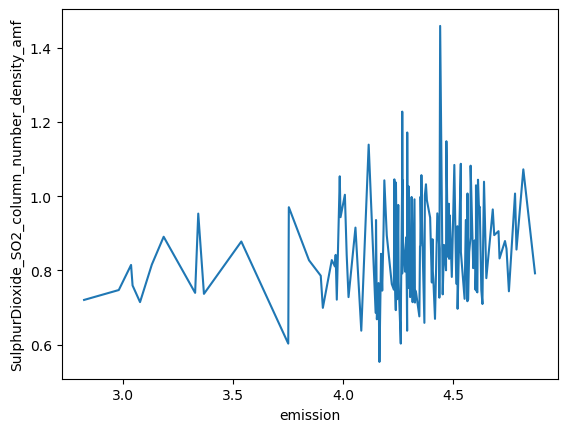

In [11]:

sns.lineplot(data = ex, x ='emission', y = 'SulphurDioxide_SO2_column_number_density_amf')

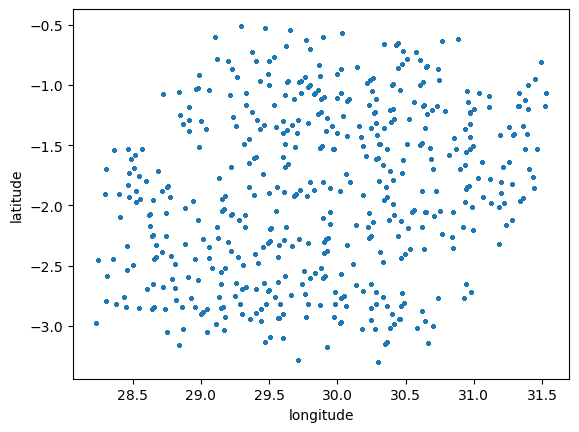

In [12]:
plt.scatter(train.longitude, train.latitude, s=3)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [13]:
# Combine train and test for easy visualisation
train_coords = train.drop_duplicates(subset = ['latitude', 'longitude'])
test_coords = test.drop_duplicates(subset = ['latitude', 'longitude'])
train_coords['set_type'], test_coords['set_type'] = 'train', 'test'

all_data = pd.concat([train_coords, test_coords], ignore_index = True)
# Create point geometries

geometry = gpd.points_from_xy(all_data.longitude, all_data.latitude)
geo_df = gpd.GeoDataFrame(
    all_data[["latitude", "longitude", "set_type"]], geometry=geometry
)

# Preview the geopandas df
geo_df.head()

C:\Users\vitor\AppData\Local\Temp\ipykernel_3584\281685623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords['set_type'], test_coords['set_type'] = 'train', 'test'
C:\Users\vitor\AppData\Local\Temp\ipykernel_3584\281685623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords['set_type'], test_coords['set_type'] = 'train', 'test'


,latitude,longitude,set_type,geometry
0,-0.510,29.290,train,POINT (29.29000 -0.51000)
1,-0.528,29.472,train,POINT (29.47200 -0.52800)
2,-0.547,29.653,train,POINT (29.65300 -0.54700)
3,-0.569,30.031,train,POINT (30.03100 -0.56900)
4,-0.598,29.102,train,POINT (29.10200 -0.59800)


In [14]:
#from https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense/notebook
# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # assign a color marker for the type set
    if geo_df.set_type[i] == "train":
        type_color = "green"
    elif geo_df.set_type[i] == "test":
        type_color = "orange"

    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            popup= 
            "Set: " + str(geo_df.set_type[i]) + "<br>"
            "Coordinates: " + str([round(x, 2) for x in geo_df_list[i]]),
            color =  type_color),
        )
    i = i + 1
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

In [15]:
#from https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense/notebook
def rgba_to_hex(color):
    """Return color as #rrggbb for the given color values."""
    red, green, blue, alpha = color
    return f"#{int(red*255):02x}{int(green*255):02x}{int(blue*255):02x}"

temp = train.groupby(['latitude', 'longitude']).emission.mean().reset_index()
geometry = gpd.points_from_xy(temp.longitude, temp.latitude)

cmap = matplotlib.colormaps['coolwarm']
normalizer = matplotlib.colors.Normalize(vmin=np.log1p(temp.emission.min()), vmax=np.log1p(temp.emission.max()))

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geometry]

# Iterate through list and add a marker for each location
for coordinates, emission in zip(geo_df_list, temp.emission):
#     print(emission, normalizer(emission), rgba_to_hex(cmap(normalizer(emission))))
    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            color = rgba_to_hex(cmap(normalizer(np.log1p(emission))))),
        )
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

In [16]:
!pip install folium

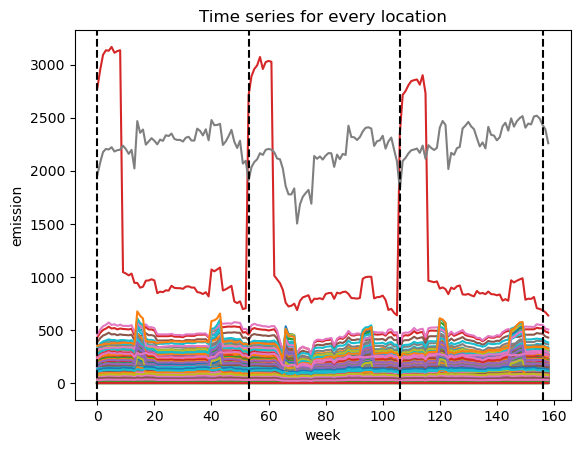

In [17]:
for ll in train[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = train[(train.latitude == ll[1].latitude) & (train.longitude == ll[1].longitude)].emission
    plt.plot(range(len(time_series)), time_series)
plt.title('Time series for every location')
for week in [0, 53, 106, 156]:
    plt.axvline(week, color='k', linestyle='--')
plt.xlabel('week')
plt.ylabel('emission')
plt.show()

Ano 2019 e 2021 parece ser simlares: covid?

In [18]:
def funcweek(n):
    r  = int(n/53)  ##freq 53
    n = n - 53*r
    return n

In [19]:
funcweek(54)

1

In [20]:
train['weekperiod'] = train['week_no'].apply(funcweek)
test['weekperiod']= test['week_no'].apply(funcweek)

In [21]:
train['weekperiod']

0         0
1         1
2         2
3         3
4         4
         ..
79018    48
79019    49
79020    50
79021    51
79022    52
Name: weekperiod, Length: 79023, dtype: int64

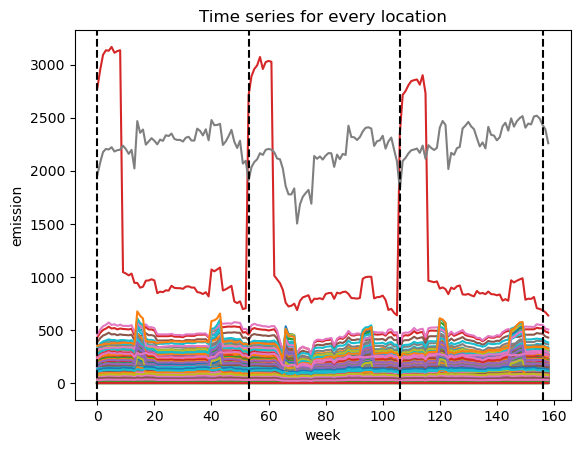

In [22]:
for ll in train[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = train[(train.latitude == ll[1].latitude) & (train.longitude == ll[1].longitude)].emission
    plt.plot(range(len(time_series)), time_series)
plt.title('Time series for every location')
for week in [0, 53, 106, 156]:
    plt.axvline(week, color='k', linestyle='--')
plt.xlabel('week')
plt.ylabel('emission')
plt.show()

In [23]:
abs(train.corr()['emission']).sort_values() ##muito baixos valores de correlação com emissão

C:\Users\vitor\AppData\Local\Temp\ipykernel_3584\180111624.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(train.corr()['emission']).sort_values() ##muito baixos valores de correlação com emissão


SulphurDioxide_SO2_column_number_density_amf    0.000347
Ozone_cloud_fraction                            0.000569
CarbonMonoxide_sensor_zenith_angle              0.000816
Cloud_cloud_fraction                            0.001249
Formaldehyde_cloud_fraction                     0.001254
                                                  ...   
Cloud_surface_albedo                            0.046587
UvAerosolLayerHeight_aerosol_pressure           0.068138
UvAerosolLayerHeight_aerosol_height             0.069008
longitude                                       0.102746
emission                                        1.000000
Name: emission, Length: 76, dtype: float64

In [24]:
columns = ['latitude', 'longitude','weekperiod', 'year', 'emission', 'week_no']

In [25]:
train[columns].head(5)

,latitude,longitude,weekperiod,year,emission,week_no
0,-0.51,29.29,0,2019,3.750994,0
1,-0.51,29.29,1,2019,4.025176,1
2,-0.51,29.29,2,2019,4.231381,2
3,-0.51,29.29,3,2019,4.305286,3
4,-0.51,29.29,4,2019,4.347317,4


In [26]:
##vou usar os dados apenas dos anos de 2019 e 2021 devido ao covid em 2020*
traindf = train[train['year'] != 2020][columns]

In [27]:
y = traindf['emission']
X = traindf.drop(columns = 'emission')

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [30]:
model = RandomForestRegressor(n_estimators=100)

In [31]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error 

In [34]:
mse = mean_squared_error(y_true=y_test, y_pred= y_pred)

In [35]:
np.sqrt(mse)

11.792961390826267

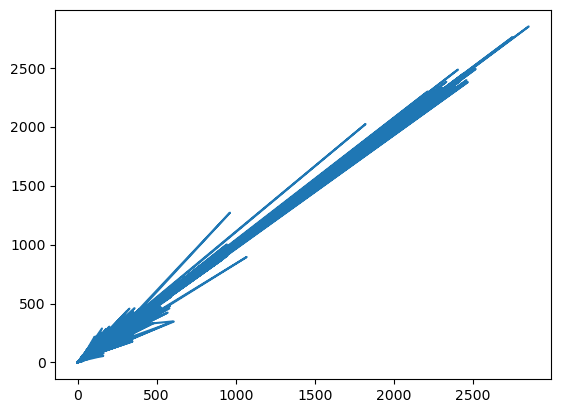

In [36]:
plt.plot(y_test, y_pred)

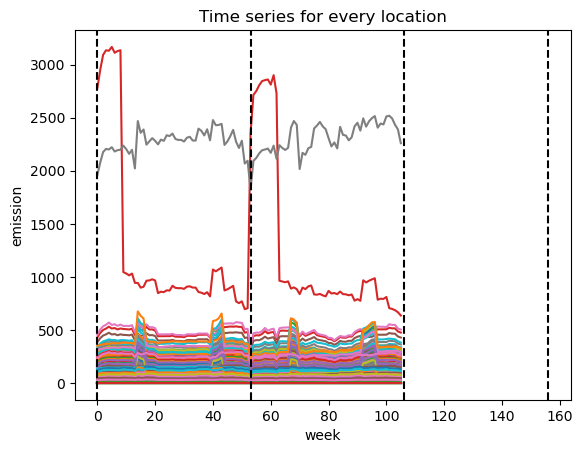

In [37]:
for ll in traindf[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = traindf[(traindf.latitude == ll[1].latitude) & (traindf.longitude == ll[1].longitude)].emission
    plt.plot(range(len(time_series)), time_series)
plt.title('Time series for every location')
for week in [0, 53, 106, 156]:
    plt.axvline(week, color='k', linestyle='--')
plt.xlabel('week')
plt.ylabel('emission')
plt.show()

In [38]:
X_test = test[['latitude', 'longitude','weekperiod', 'year', 'week_no']]
model.fit(X, y) ##fit with all data
y_pred = model.predict(X_test)

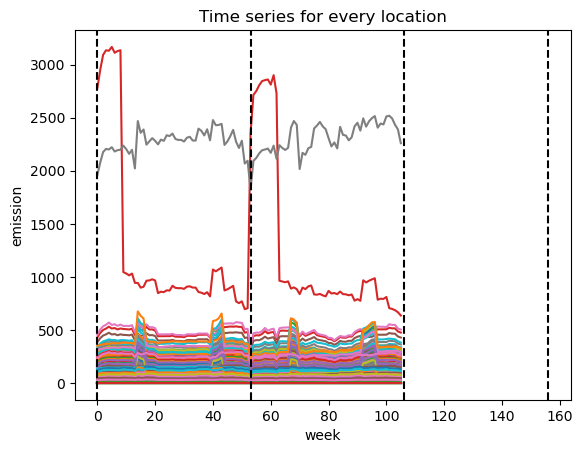

In [39]:
for ll in traindf[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = traindf[(traindf.latitude == ll[1].latitude) & (traindf.longitude == ll[1].longitude)].emission
    plt.plot(range(len(time_series)), time_series)
plt.title('Time series for every location')
for week in [0, 53, 106, 156]:
    plt.axvline(week, color='k', linestyle='--')
plt.xlabel('week')
plt.ylabel('emission')
plt.show()

In [40]:
X_test['emission'] = y_pred

C:\Users\vitor\AppData\Local\Temp\ipykernel_3584\721293277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['emission'] = y_pred


In [41]:
traindfcomp = pd.concat([traindf, X_test])

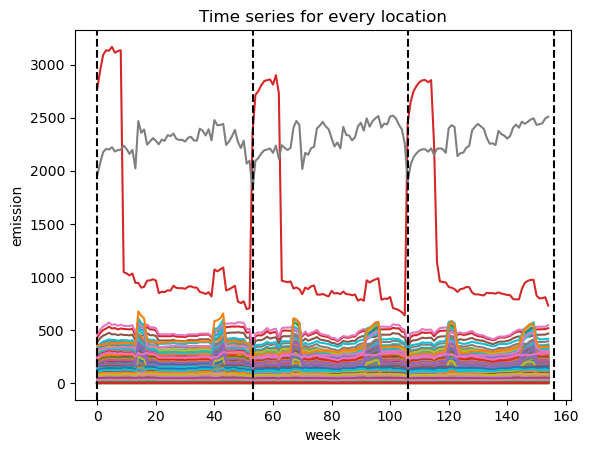

In [42]:
for ll in traindfcomp[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = traindfcomp[(traindfcomp.latitude == ll[1].latitude) & (traindfcomp.longitude == ll[1].longitude)].emission
    plt.plot(range(len(time_series)), time_series)
plt.title('Time series for every location')
for week in [0, 53, 106, 156]:
    plt.axvline(week, color='k', linestyle='--')
plt.xlabel('week')
plt.ylabel('emission')
plt.show()

In [43]:
##submission
test['emission'] = y_pred

In [44]:
submission = test[['ID_LAT_LON_YEAR_WEEK', 'emission']]

In [45]:
submission.to_csv('submission2.csv', index= False)